## Doğrusal Regresyon (Linear Regression) Nedir?

Doğrusal regresyon, ilgili ve bilinen başka bir veri değeri kullanarak bilinmeyen verilerin değerini tahmin eden bir veri analizi tekniğidir. **Denetimli Öğrenme** kategorisinin altındadır.

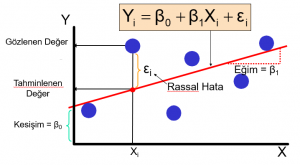

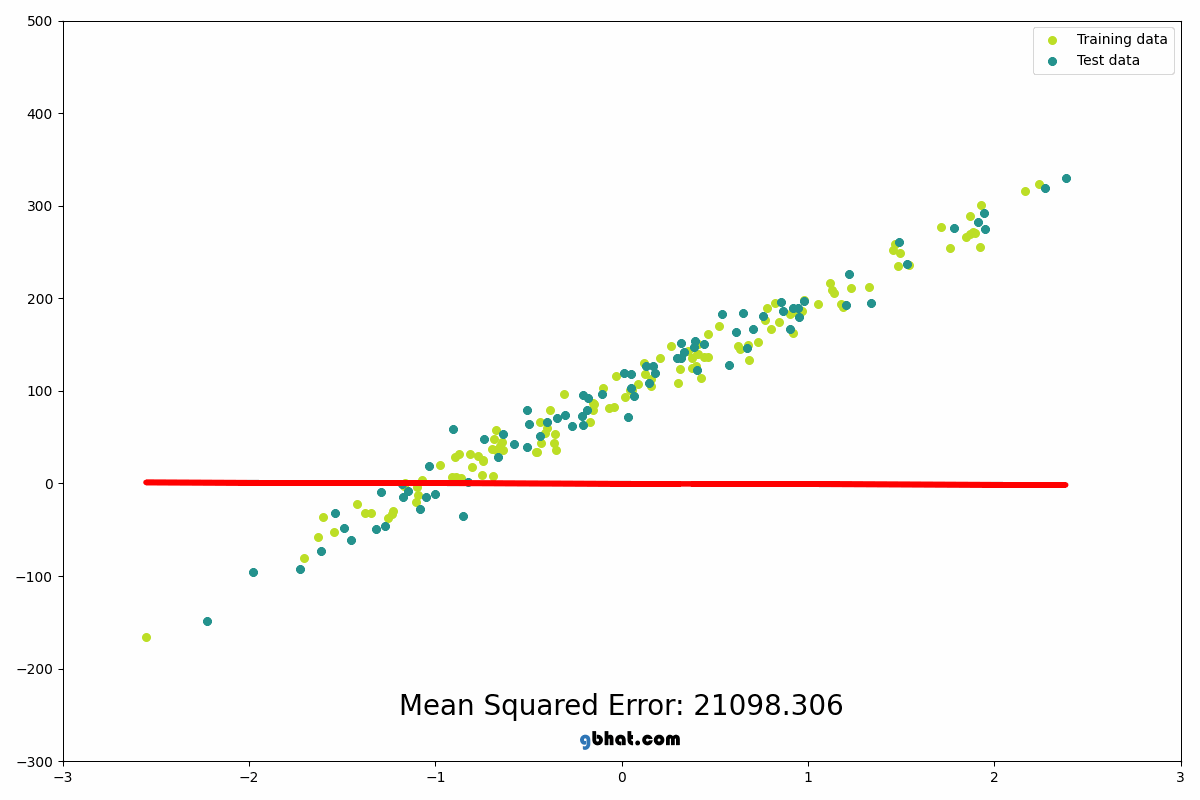

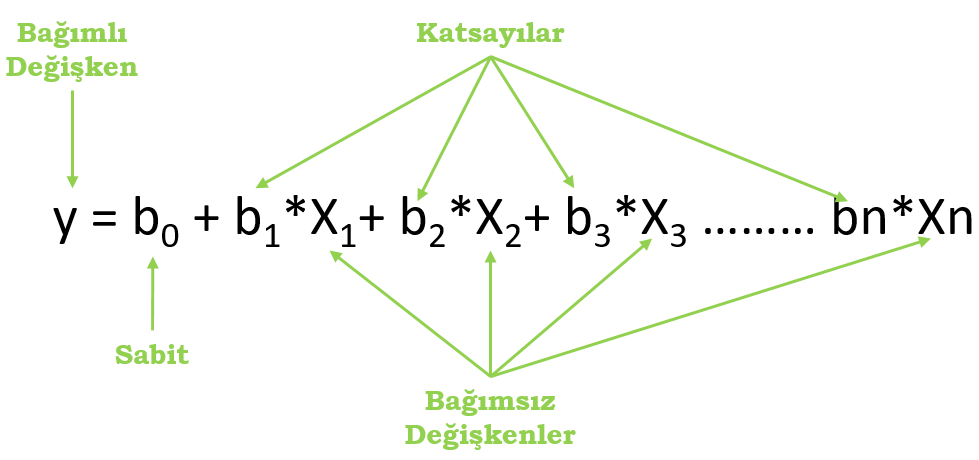

---

In [1]:
# Gerekli Modülleri İndirelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Veriyi Okuyalım
data = pd.read_csv('Salary_Data.csv')

In [4]:
# Veriyi Basitçe Görelim
data.head(10)

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0

In [5]:
# Kaç Adet Veri Noktamız Olduğuna Bakalım
len(data)

30

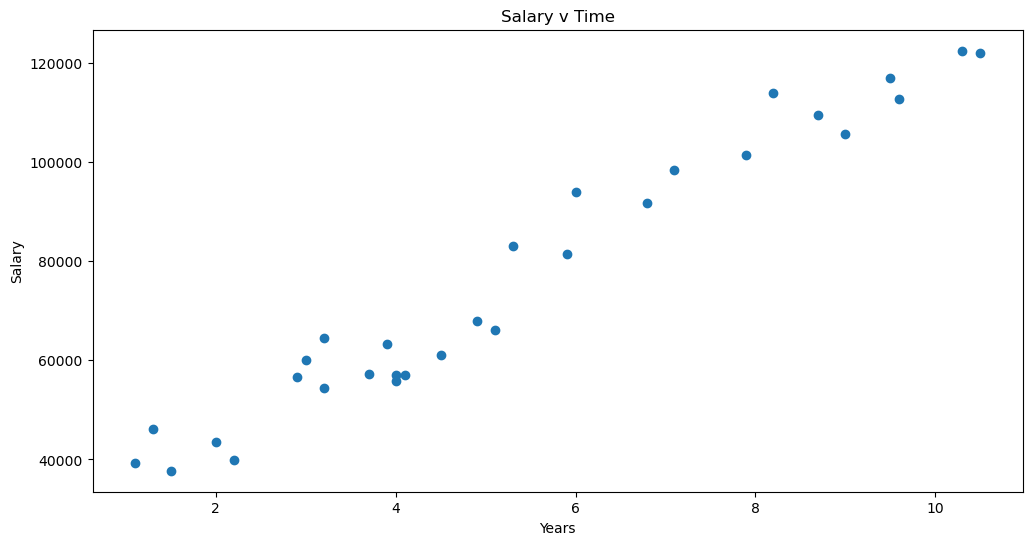

In [7]:
# Veriyi Grafikte Görselleştirelim
plt.figure(figsize=(12,6))
plt.scatter(data["YearsExperience"],data["Salary"])
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary v Time')
plt.show()

In [8]:
# X data
X = data['YearsExperience']

In [9]:
# y data
y = data['Salary']

In [10]:
# Modülden Gerekli Fonksiyonumuzu Alalım
from sklearn.model_selection import train_test_split

In [11]:
# Veriyi 70-30 Oranında Train Ve Test Olarak Bölelim
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

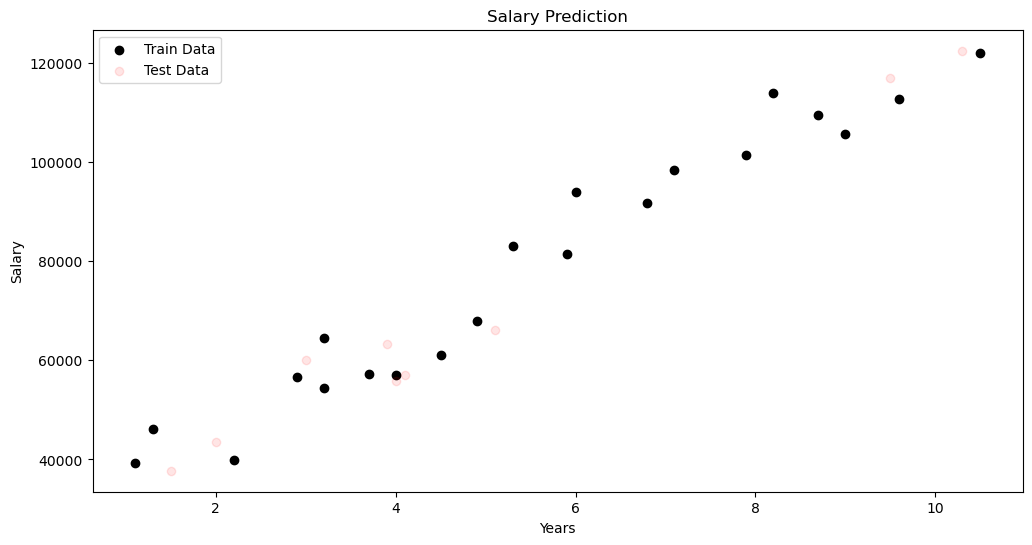

In [12]:
# Tekrar Görselleştirelim
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color='k', label = "Train Data") 
plt.scatter(X_test, y_test, color='r', alpha = 0.1, label = "Test Data")
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()

---

# scikit-learn Kütüphanesi Nedir?

Veri bilimi ve machine learning için en yaygın kullanılan Python paketlerinden biridir. Birçok işlemi gerçekleştirmenizi sağlar ve çeşitli algoritmalar sağlar. Scikit-learn ayrıca sınıfları, yöntemleri ve işlevleri ile kullanılan algoritmaların arka planıyla ilgili belgeler sunar.

In [13]:
# Hazır Linear Regresyon Modelini Kullanalım
from sklearn.linear_model import LinearRegression

In [14]:
# Modeli Üretelim
lr = LinearRegression()

In [13]:
# Modeli Eğitelim
lr.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.2  5.1  5.9  6.8  3.9  9.5  4.9  7.9 10.3  4.1  1.1  8.2  1.5  3.
  4.   2.   8.7  4.   7.1  2.9 10.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
# Verinin Boyutunu Kontrol Edelim
X_train.shape

(21,)

In [16]:
X_train

7      3.2
16     5.1
18     5.9
20     6.8
10     3.9
26     9.5
15     4.9
22     7.9
28    10.3
13     4.1
0      1.1
23     8.2
2      1.5
6      3.0
11     4.0
3      2.0
24     8.7
12     4.0
21     7.1
5      2.9
29    10.5
Name: YearsExperience, dtype: float64

In [17]:
# Verinin Tipini Öğrenelim
type(X_train)

pandas.core.series.Series

In [18]:
# pandas Series -> numpy yapılması lazım, daha sonra şeklini düzenleyebiliyoruz
X_train.to_numpy().reshape(-1,1)

array([[ 3.2],
       [ 5.1],
       [ 5.9],
       [ 6.8],
       [ 3.9],
       [ 9.5],
       [ 4.9],
       [ 7.9],
       [10.3],
       [ 4.1],
       [ 1.1],
       [ 8.2],
       [ 1.5],
       [ 3. ],
       [ 4. ],
       [ 2. ],
       [ 8.7],
       [ 4. ],
       [ 7.1],
       [ 2.9],
       [10.5]])

In [19]:
# Tüm Veriyi Düzenleyelim
X_train_ = X_train.to_numpy().reshape(-1,1)
X_test_  = X_test.to_numpy().reshape(-1,1)
y_train_ = y_train.to_numpy().reshape(-1,1)
y_test_  = y_test.to_numpy().reshape(-1,1)

In [20]:
# Modeli Şimdi Eğitmeye Çalışalım
lr = lr.fit(X_train_,y_train_)

In [21]:
# Eğitilmiş Modele Göre Test Verilerini Tahminde Kullanalım
y_pred = lr.predict(X_test_)

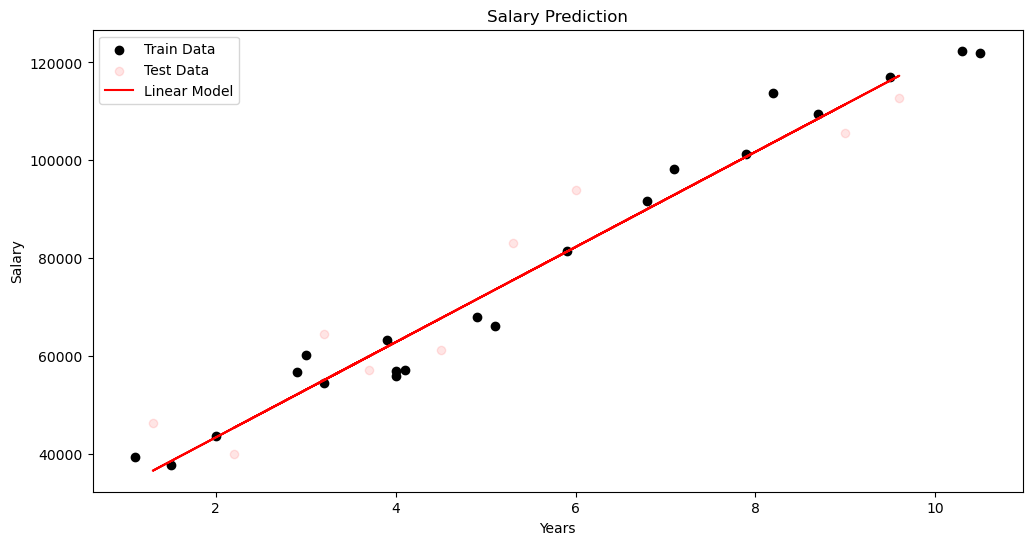

In [22]:
# Tahminleri Görselleştirelim
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color='k', label = "Train Data") 
plt.scatter(X_test, y_test, color='r', alpha = 0.1, label = "Test Data")
plt.plot(X_test, y_pred, color='r', label = "Linear Model") 
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()

In [23]:
lr.coef_

array([[9733.72724476]])

In [24]:
lr.intercept_

array([23834.23132147])

$$
y = a*X + b
$$

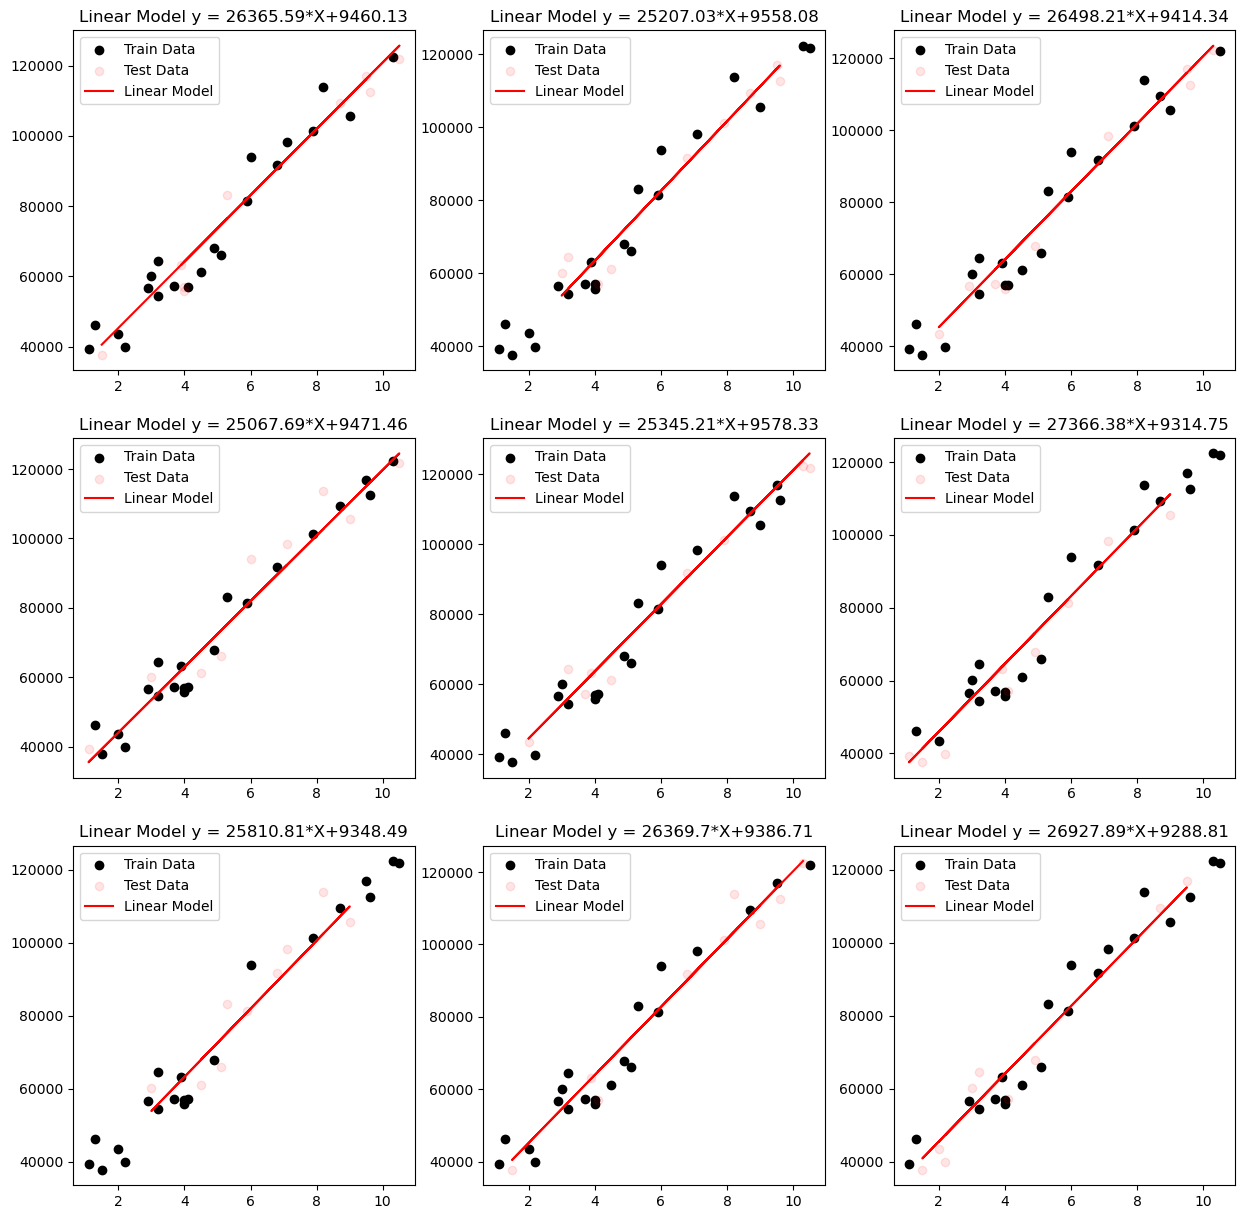

In [25]:
# Bu işlemi 9 Kere Yapıp Sonuçlarına Bakalım
fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(9):
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7)
    lr = LinearRegression().fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))
    y_pred = lr.predict(X_test.to_numpy().reshape(-1,1))
    axs[i//3,i%3].scatter(X_train, y_train, color='k', label = "Train Data") 
    axs[i//3,i%3].scatter(X_test, y_test, color='r', alpha = 0.1, label = "Test Data")
    axs[i//3,i%3].plot(X_test, y_pred, color='r', label = "Linear Model") 
    axs[i//3,i%3].set_title(f"Linear Model y = {round(lr.intercept_.item(),2)}*X+{round(lr.coef_.item(),2)}")
    axs[i//3,i%3].legend()

---

## Karar Ağaçları (Decision Trees) Nedir?

Temel fikri, veri setine sorulan her soru ile veri setinin düzensizliğini azaltmayı amaçlayan, sınıflandırma ve regresyon problemlerinde kullanılabilen bir **Denetimli Öğrenme** yöntemidir. 

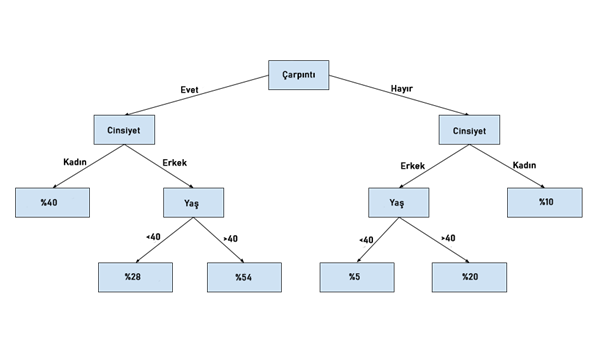

In [91]:
# scikit-learn kütüphanesi ile Rastgele Veri Üretelim
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=2,
                  random_state=0, cluster_std=1.0)

In [92]:
# Biz ne ürettik?
X

array([[ 3.35941485,  5.24826681],
       [ 2.93110028,  0.78255619],
       [ 1.12031365,  5.75806083],
       [ 2.87685323,  0.90295631],
       [ 1.66608824,  5.60563356],
       [ 1.37531642,  1.53119457],
       [ 2.7216506 ,  0.43694387],
       [ 1.92569089,  4.39133857],
       [ 2.25456772,  0.84706012],
       [ 2.74904067,  0.73809022],
       [ 1.53774848, -0.0811662 ],
       [-0.44779083,  3.81046744],
       [ 2.09389807, -0.75905144],
       [ 1.7373078 ,  4.42546234],
       [ 1.66780883,  4.99853647],
       [-0.31431938,  1.76171596],
       [ 2.11567076,  3.06896151],
       [ 1.59034945,  5.225994  ],
       [-0.23335252,  1.14914807],
       [ 0.2506727 ,  2.92042337],
       [ 2.39417165,  2.91870722],
       [ 2.47034915,  4.09862906],
       [ 0.37995604,  4.25122003],
       [-0.63762777,  4.09104705],
       [ 0.72305587, -1.07096103],
       [ 2.33570923, -0.09545995],
       [ 0.58894326,  4.00148458],
       [ 1.84836385,  1.77784257],
       [ 1.61434489,

In [93]:
# Boyutuna da Bakalım
X.shape

(300, 2)

In [94]:
# Biz ne ürettik?
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [95]:
# Boyutuna da Bakalım
y.shape

(300,)

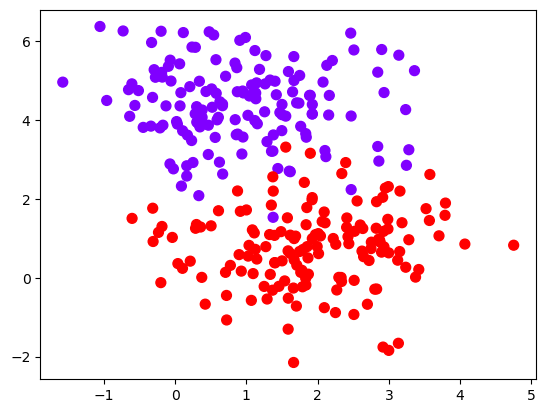

In [96]:
# Rastgele Verimize Bakalım
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [97]:
# Kütüphaneden Modelimizi İndirelim
from sklearn.tree import DecisionTreeClassifier

# Modelimizi Verimize Fit Edelim
tree = DecisionTreeClassifier(random_state=0).fit(X, y)

In [98]:
# Şimdilik Burası Önemli Değil, Daha Sonra Döneceğiz
def visualize_classifier(model, X, y):
    fig= plt.figure(figsize = (16,8))
    
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

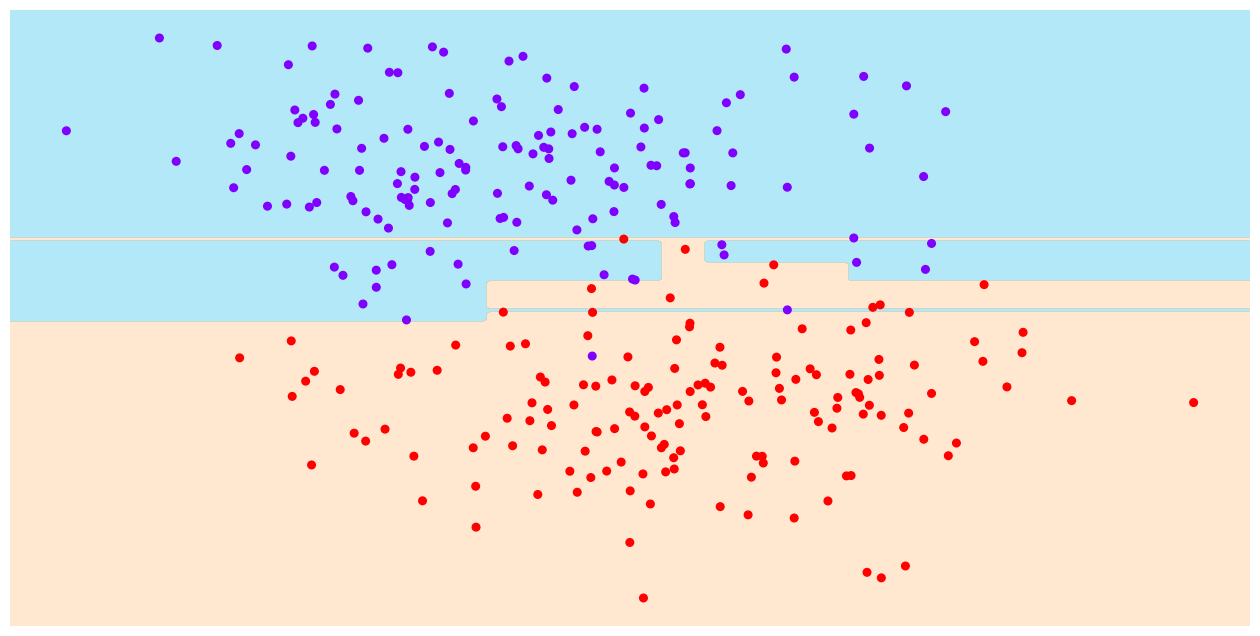

In [99]:
# Karar Ağacımızı Görselleştirelim
visualize_classifier(tree, X, y)

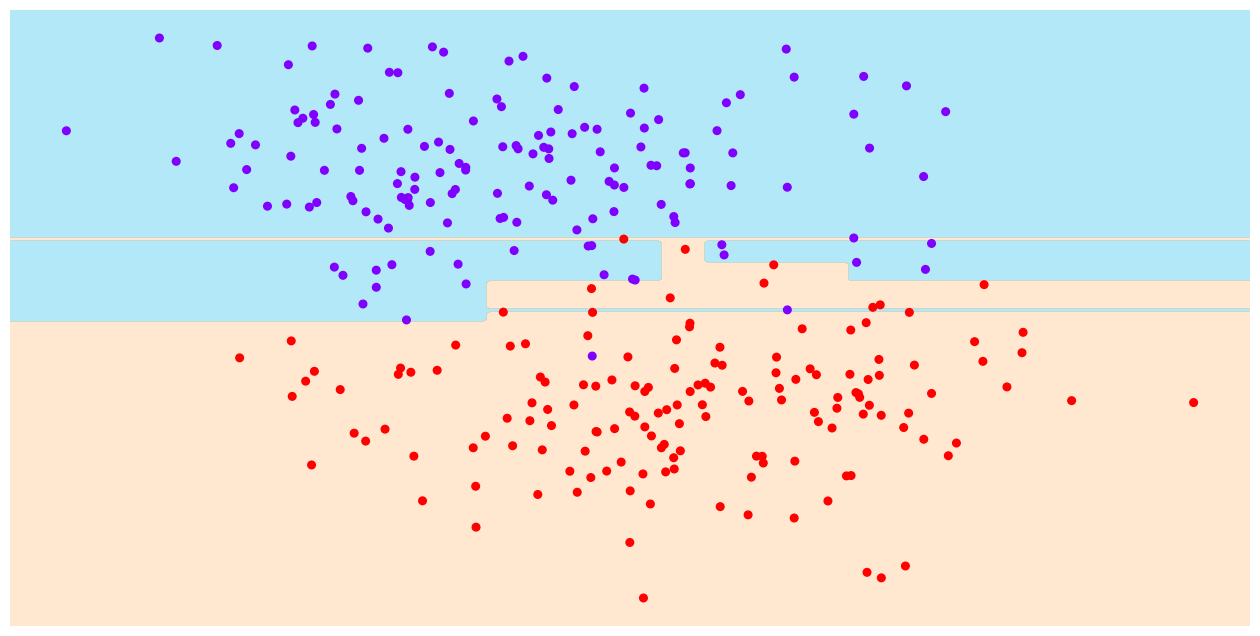

In [100]:
# Başka Bir Ağaç Daha Eğitelim

# Modelimizi Verimize Fit Edelim
tree = DecisionTreeClassifier(random_state=99).fit(X, y)

# Karar Ağacımızı Görselleştirelim
visualize_classifier(tree, X, y)

---

## Rastgele Orman (Random Forest) Nedir?

Birden çok ve **birbirinden farklı**, bağımsız veya bağımlı karar ağaçlarının üretilip sonuçların çoğunluğuna göre karar verilen algoritmadır.

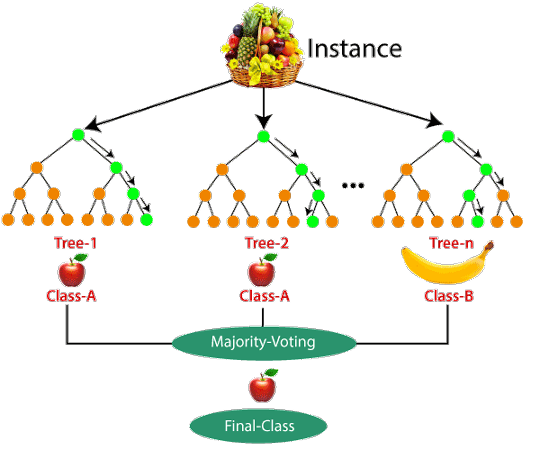

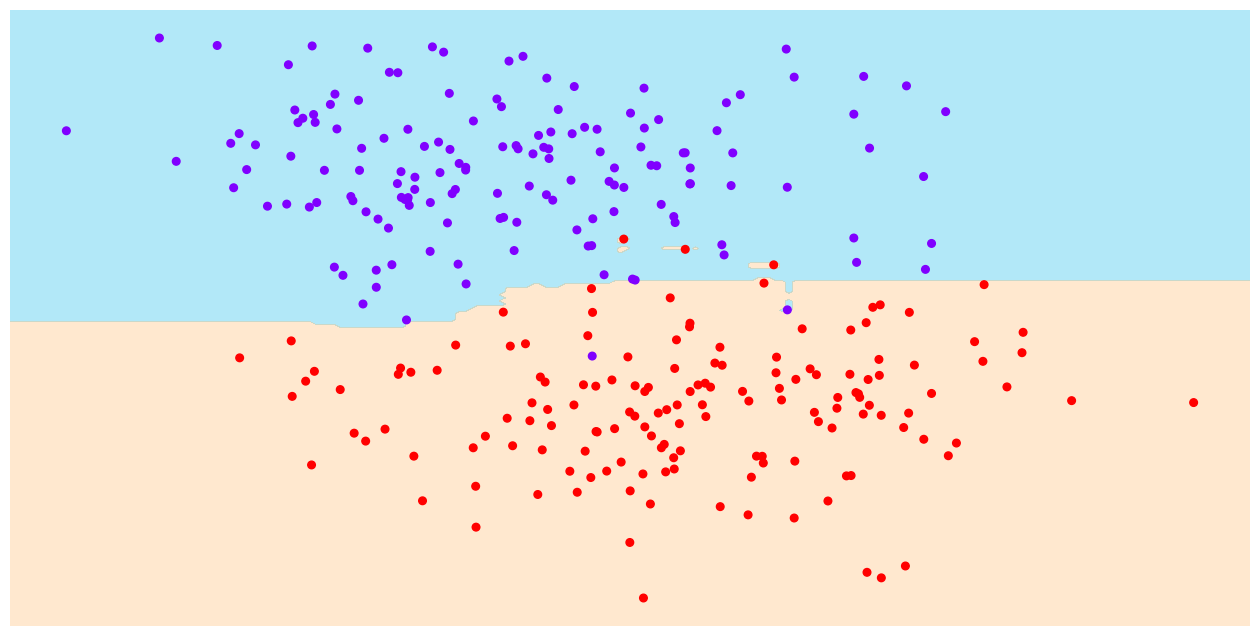

In [101]:
# Kütüphaneden Modelimizi İndirelim
from sklearn.ensemble import RandomForestClassifier

# Modelimizi Verimize Fit Edelim
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y)

# Plot
visualize_classifier(forest, X, y);

Rastgele Orman, en basit **Topluluk Öğrenimi (Ensemble Learning)** algoritmasıdır.

Topluluk Öğrenimi İkiye Ayrılır:
- Bagging : Her model aynı veri setinin farklı alt parçaları ile eğitilir, karar verme süreci paraleldir.
- Boosting : Her model sıralı bir şekilde eğitilir. Her bir model, önceki modelin yaptığı hatalardan ders alır.

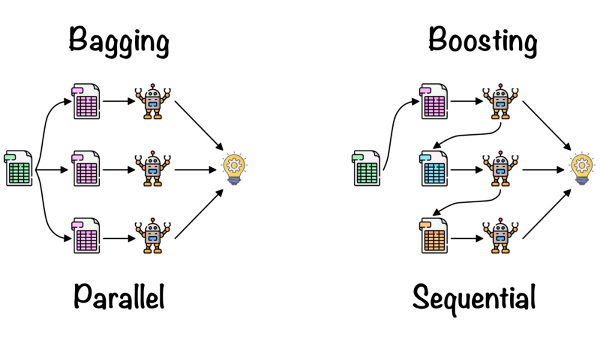

---

## K Tane En Yakın Komşu (K-Nearest-Neighbors) Nedir?

Sınıflandırma işlemleri için kullanılan, eğitimi yapılan veri seti içerisindeki örneklerden en yakın K tanesinin çoğunluk sınıfına göre sonuç üreten **Denetimli Öğrenme** algoritmasıdır.

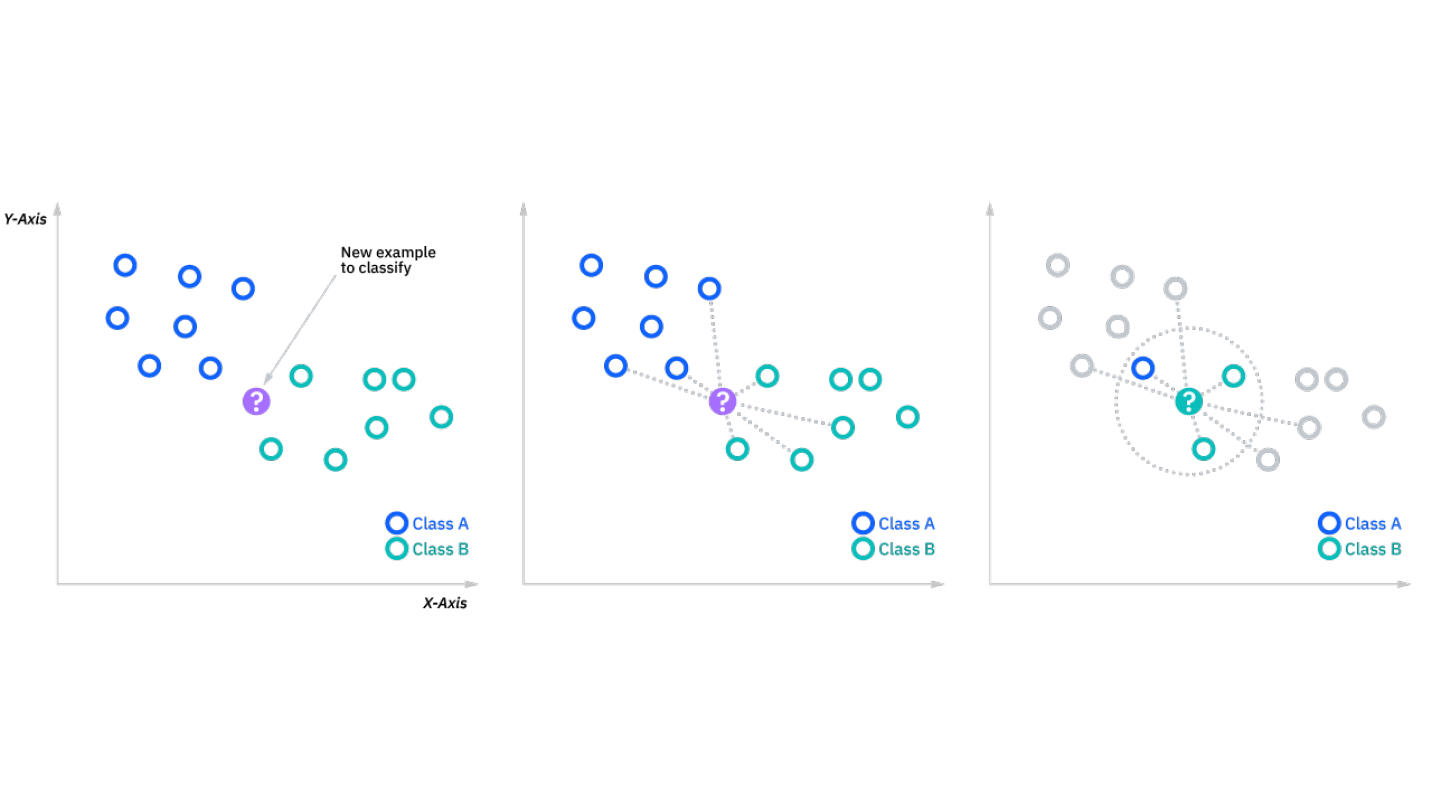

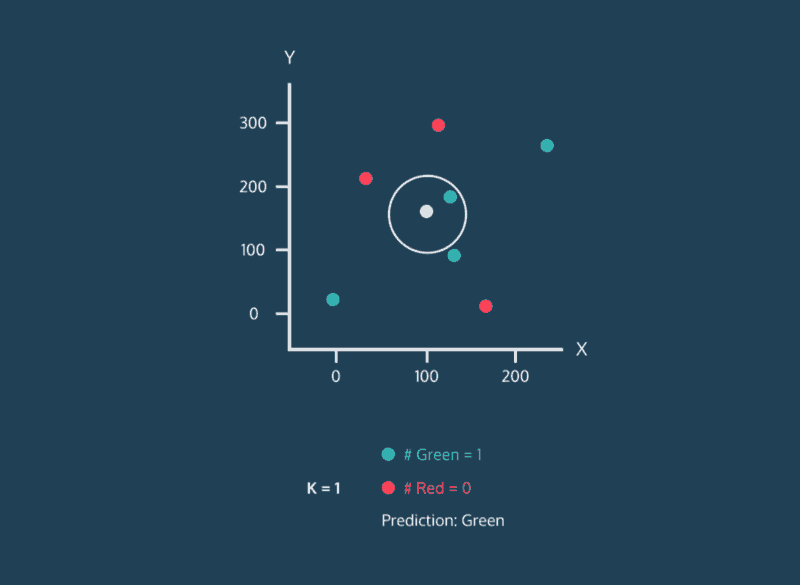

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# Veriyi Okuyalım.
data = pd.read_csv("data.csv")

# Veriye Bakalım
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [104]:
# Kaç Tane Veri Noktamız Olduğuna Bakalım

In [105]:
len(data)

569

In [106]:
# Verimizi Temizleyelim
data.drop(['id','Unnamed: 32'], axis = 1, inplace= True )

# Veriye Bakalım
data.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

In [107]:
# Sınıfımızı Belirleyelim
M = data[data["diagnosis"] == "M"]
B = data[data["diagnosis"] == "B"]

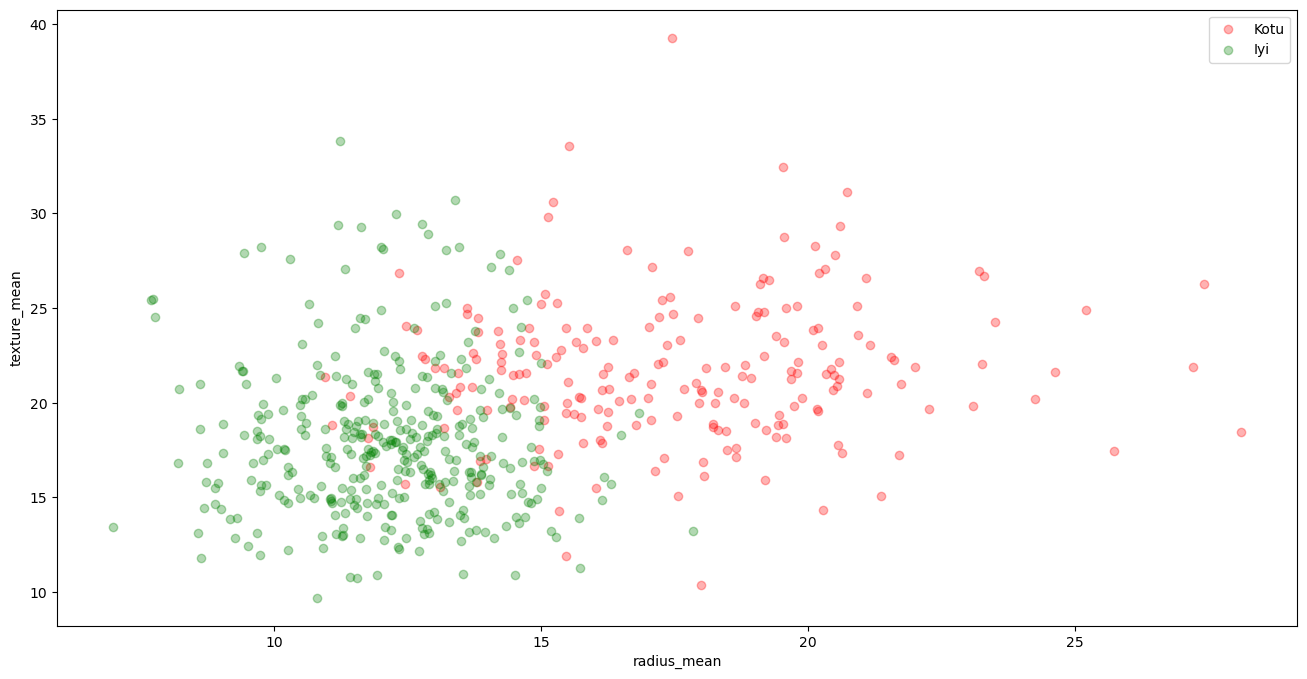

In [108]:
# 2D Gröselleştirme Yapalım
fig = plt.figure(figsize=(16,8))
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [109]:
# "M" -> 1 ve "B" -> 0
data["diagnosis"] = [1 if diag == "M" else 0 for diag in data["diagnosis"]]

In [110]:
#Veriye Tekrar Bakalım
data.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   
7          1        13.71         20.83           90.20      577.9   
8          1        13.00         21.82           87.50      519.8   
9          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

In [111]:
# Veri Setimiz Artık Hazır
y = data["diagnosis"].values
X = data.drop(["diagnosis"] ,axis = 1)

## Normalizasyon Yapalım ama Normalizasyon Nedir ve Ne Gerek Var?

In [112]:
X = (X - X.min()) / (X.max() - X.min())

X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.605518  ...      0.620776       0.141525         0.668310   
1                0.141323  ...      0.606901       0.303571         0.539818   
2                0.211247  ...      0.556386       0.360075         0.508442   
3                1.000000  ...      0.248310       0.385928         0.241347   
4                0.186816  ...      0.519744       0.123934         0.506948   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 30 columns]

In [113]:
# Sonunda Model Eğitimine Başlayabiliriz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7, random_state = 0)

In [15]:
# Hazır Modelimizi Indirelim
from sklearn.neighbors import KNeighborsClassifier

# Modelimizi Üretetelim
knn = KNeighborsClassifier(n_neighbors=4)

# Eğitelim
knn = knn.fit(X_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.8 10.5  9.   5.9  4.5  3.7  4.   8.7  2.9  8.2  1.3  4.9  9.6  2.2
  5.3  7.9  6.   7.1  1.1  3.2  3.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [115]:
# Modelimizin Başarısına Bakalım
y_pred = knn.predict(X_test)
print(f"Score : {knn.score(X_test,y_test)}")

Score : 0.949874686716792


C:\Users\Bugrahan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Bugrahan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [116]:
# Model Sonucu ile Beklentilerimizi Karşılaştıralım 
for i in range(10):
    print(f"ÖrnekNo:{i}\tBeklenen:{y_test[i]}\tModelSonucu:{y_pred[i]}")

ÖrnekNo:0	Beklenen:1	ModelSonucu:1
ÖrnekNo:1	Beklenen:0	ModelSonucu:0
ÖrnekNo:2	Beklenen:0	ModelSonucu:0
ÖrnekNo:3	Beklenen:0	ModelSonucu:0
ÖrnekNo:4	Beklenen:0	ModelSonucu:0
ÖrnekNo:5	Beklenen:0	ModelSonucu:0
ÖrnekNo:6	Beklenen:0	ModelSonucu:0
ÖrnekNo:7	Beklenen:0	ModelSonucu:0
ÖrnekNo:8	Beklenen:0	ModelSonucu:0
ÖrnekNo:9	Beklenen:0	ModelSonucu:0


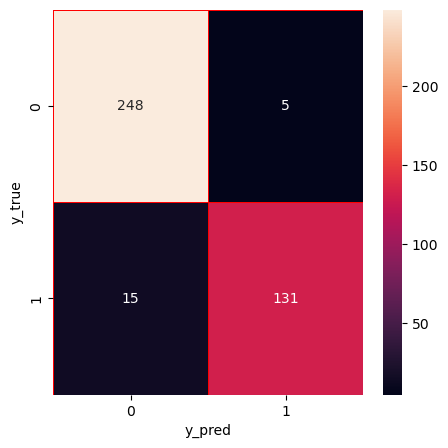

In [117]:
# Confusion Matrix İndirip Kullanalım
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Görselleştirelim

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

C:\Users\Bugrahan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Bugrahan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

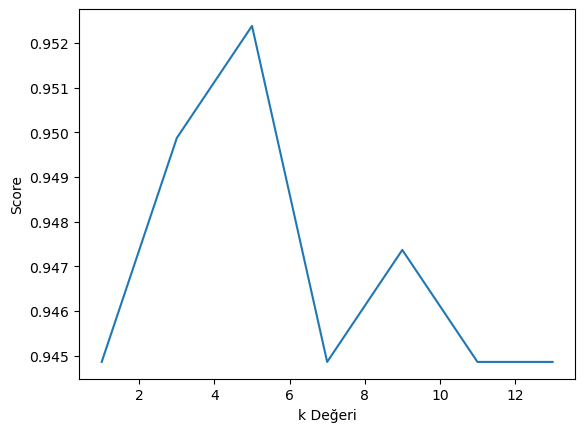

In [118]:
# Ideal hiper-parametremizi bulalım
score_list = []
for each in range(1,15,2):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15,2),score_list)
plt.xlabel("k Değeri")
plt.ylabel("Score")
plt.show()

---

## Destek Vektör Makineleri (Support Vector Machines) Nedir?

Genellikle sınıflandırma problemlerinde kullanılan **Denetimli Öğrenme** yöntemlerinden biridir. Bir uzaydaki noktaları birbirinden ayırmak için bir hiper düzlem (çok boyutlu düzlem) çizer. Bu düzlemin, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar.

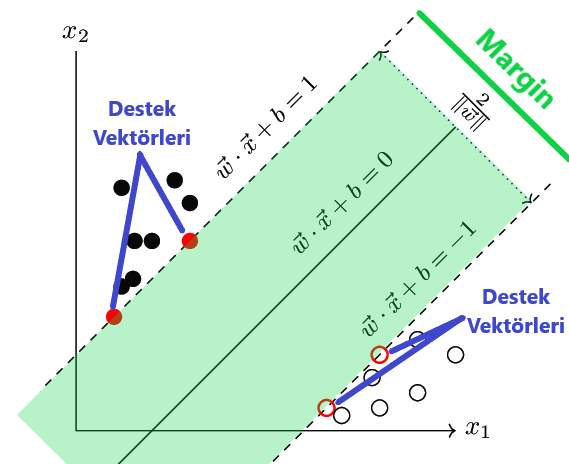

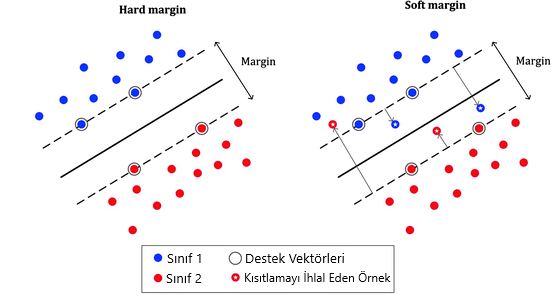

In [119]:
# Aynı Şekilde Modelimizi İndirip Kullanalım
from sklearn.svm import SVC

# Modelimizi Üretetelim
svm = SVC(random_state = 1)

# Eğitelim
svm = svm.fit(X_train,y_train)

In [120]:
# Modelimizin Başarısına Bakalım
y_pred = svm.predict(X_test)
print(f"Score : {svm.score(X_test,y_test)}")

Score : 0.9674185463659147


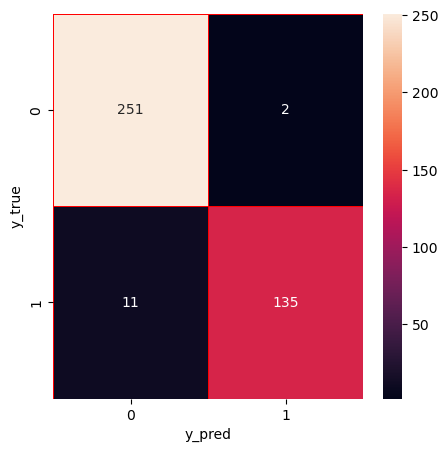

In [121]:
# Confusion Matrix Kullanalım

cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Görselleştirelim
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

---

## K-Tane Ortalama (K-Means) Nedir?

Bilinen Sınıfı/Etiketi bulunmayan veri setini K adet sınıfa ayıran **Denetimsiz Öğrenme** Algoritmasıdır. 

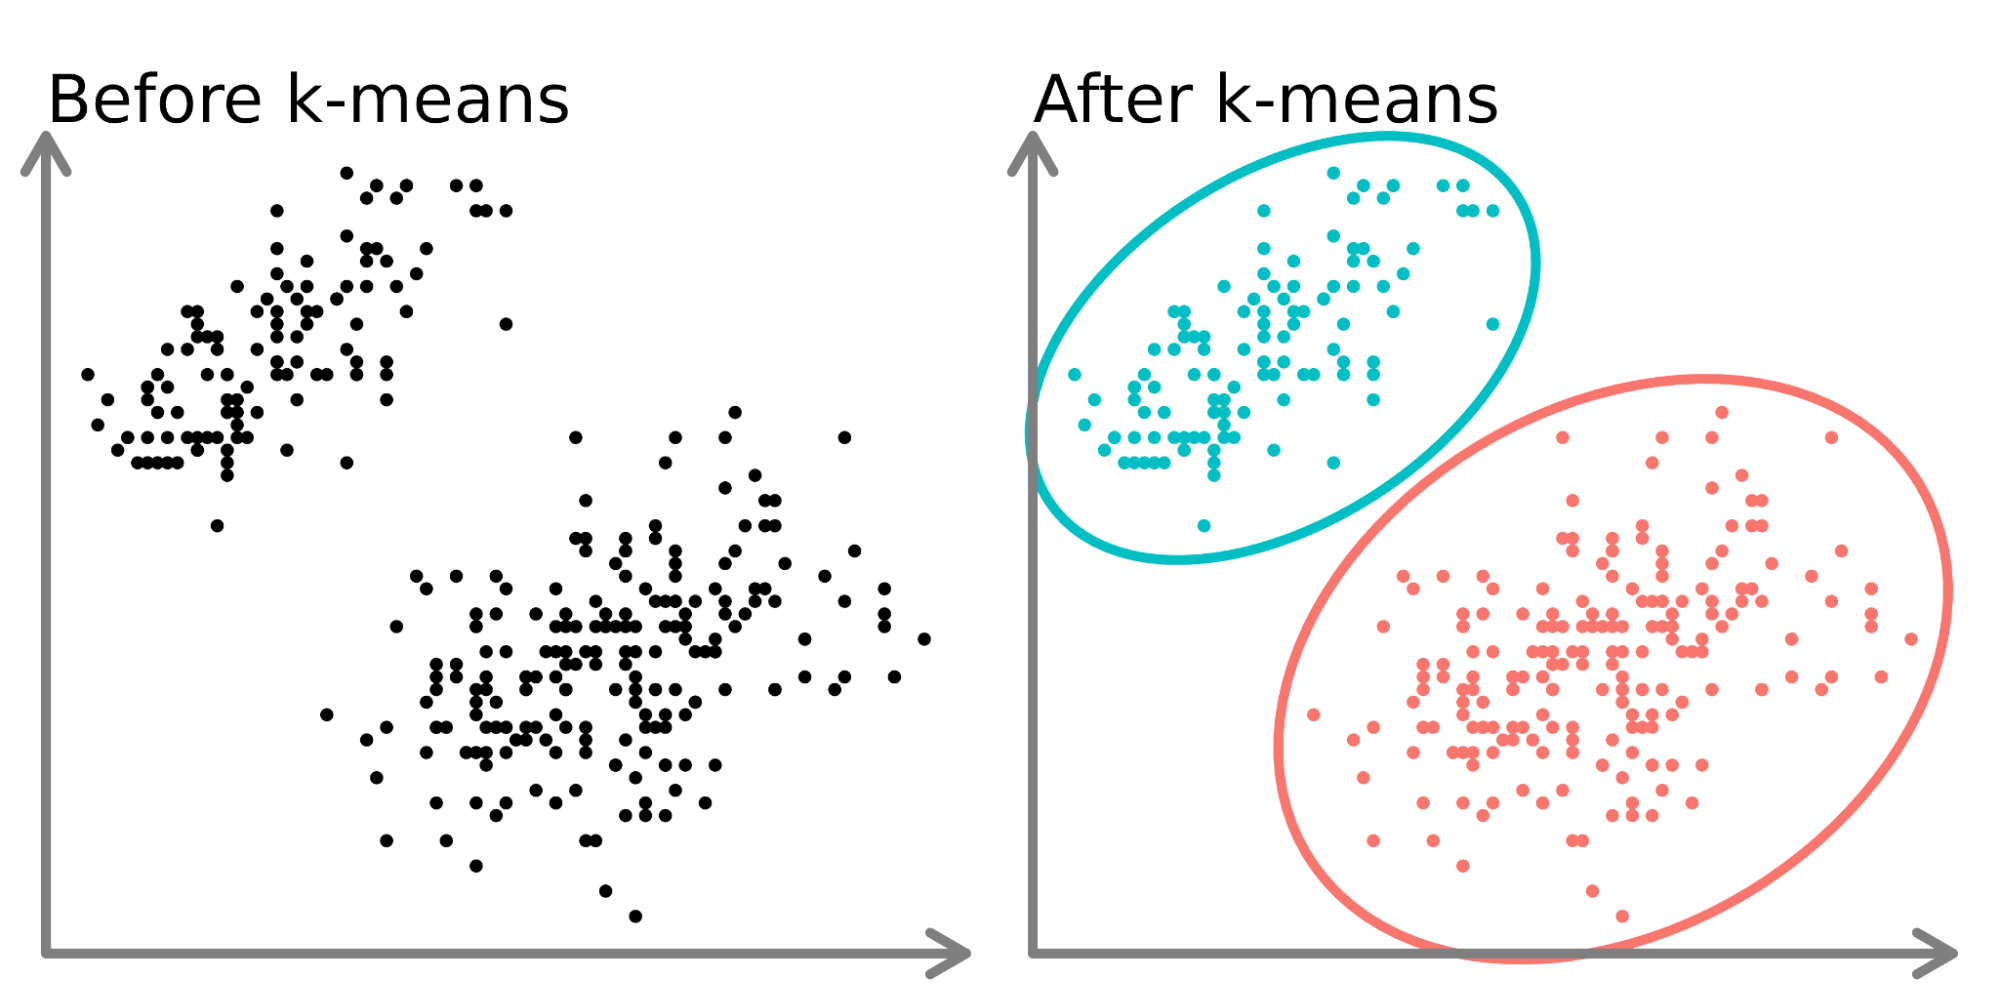

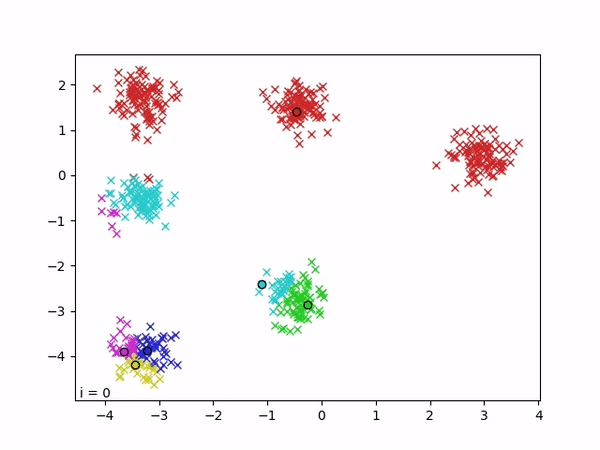

In [122]:
# Kütüphanelerimizi Indirelim
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [123]:
# Verilerimizi Oluşturalım
X, y = make_blobs(
    n_samples=200, 
    n_features=2,       
    centers=3, 
    cluster_std=0.5,
    random_state=0
)

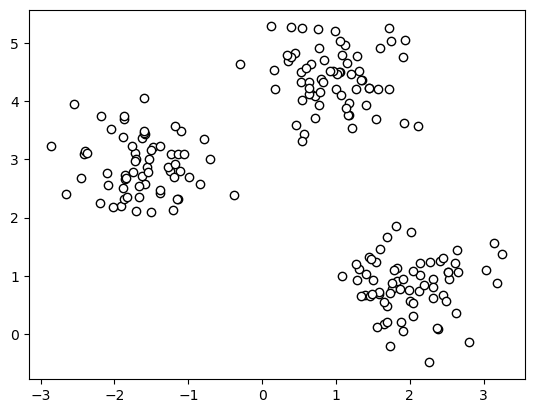

In [124]:
# Verimizi Çizdirelim
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

In [125]:
# Modelimizi Oluşturalım
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1)

In [126]:
# Aynı Anda Hem fit Edip Hem de predict Edebiliriz
y_km = kmeans.fit_predict(X)

In [127]:
# Cluster Merkezlerimizi Öğrenelim
kmeans.cluster_centers_

array([[-1.62597658,  2.89784482],
       [ 2.00955762,  0.8313862 ],
       [ 0.96573445,  4.39663084]])

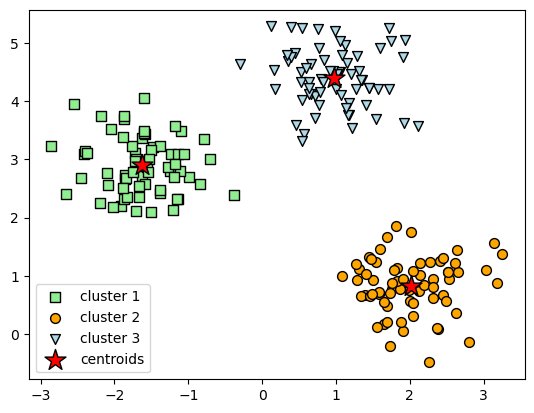

In [128]:
# Cluster'larımızı Çizelim
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

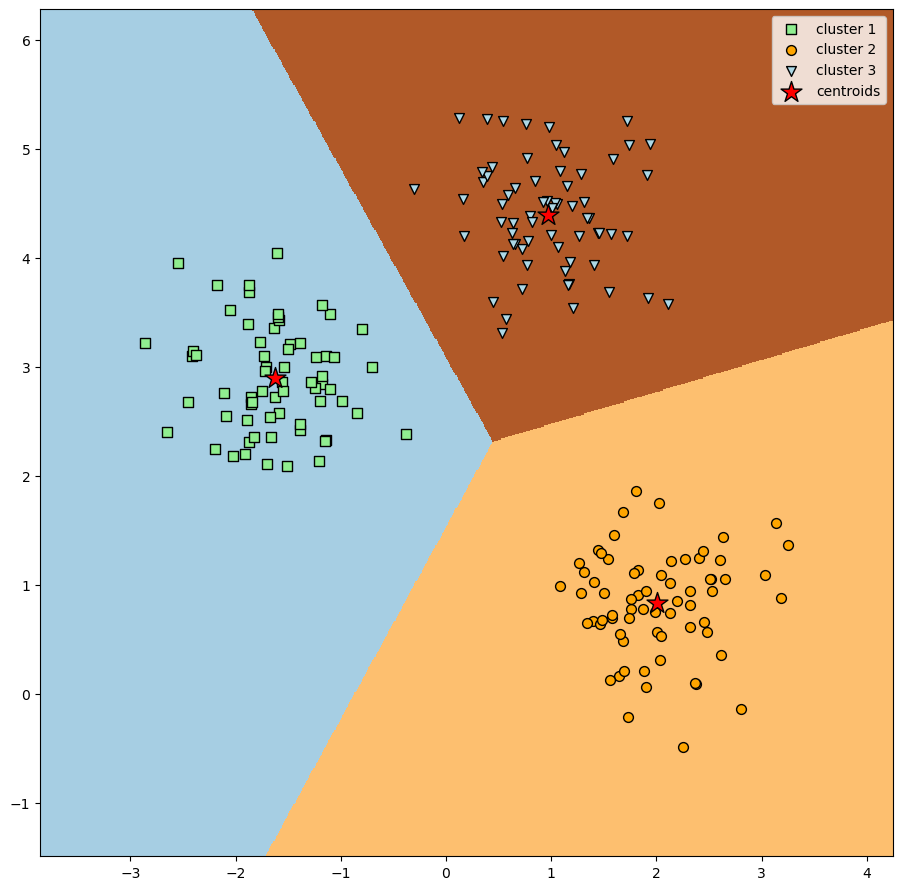

In [129]:
# Cluster'larımızın Sınırlarını Öğrenelim

# Mesh size
h = .01

# Sınırlarımızı Belirleyelim
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Bu Sınırlar İçerisinde Bir Mesh Oluşturalım
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Mesh'i Modelden Geçirelim
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Mesh'i Görselleştirelim
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# Veriyi Görselleştirelim
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Veri Merkezlerini Yazalım
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

# Grafik Güncellemeleri
plt.legend(scatterpoints=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.show()

Peki ya Cluster Sayımız Verimize Uygun Değilse?

In [130]:
# Verilerimizi Oluşturalım
X, y = make_blobs(
    n_samples=200, 
    n_features=2,       
    centers=5, 
    cluster_std=0.5,
    random_state=0
)

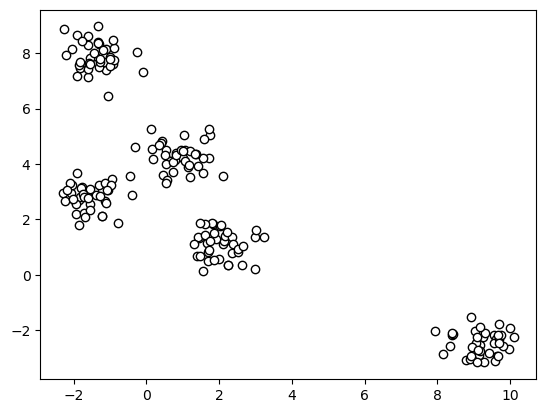

In [131]:
# Verimizi Çizdirelim
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

In [132]:
# Modelimizi Oluşturalım
kmeans = KMeans(3)

In [133]:
# Aynı Anda Hem fit Edip Hem de predict Edebiliriz
y_km = kmeans.fit_predict(X)

In [134]:
# Cluster Merkezlerimizi Öğrenelim
kmeans.cluster_centers_

array([[-1.36754522,  7.89153496],
       [ 9.21059989, -2.47392331],
       [ 0.47539327,  2.7349496 ]])

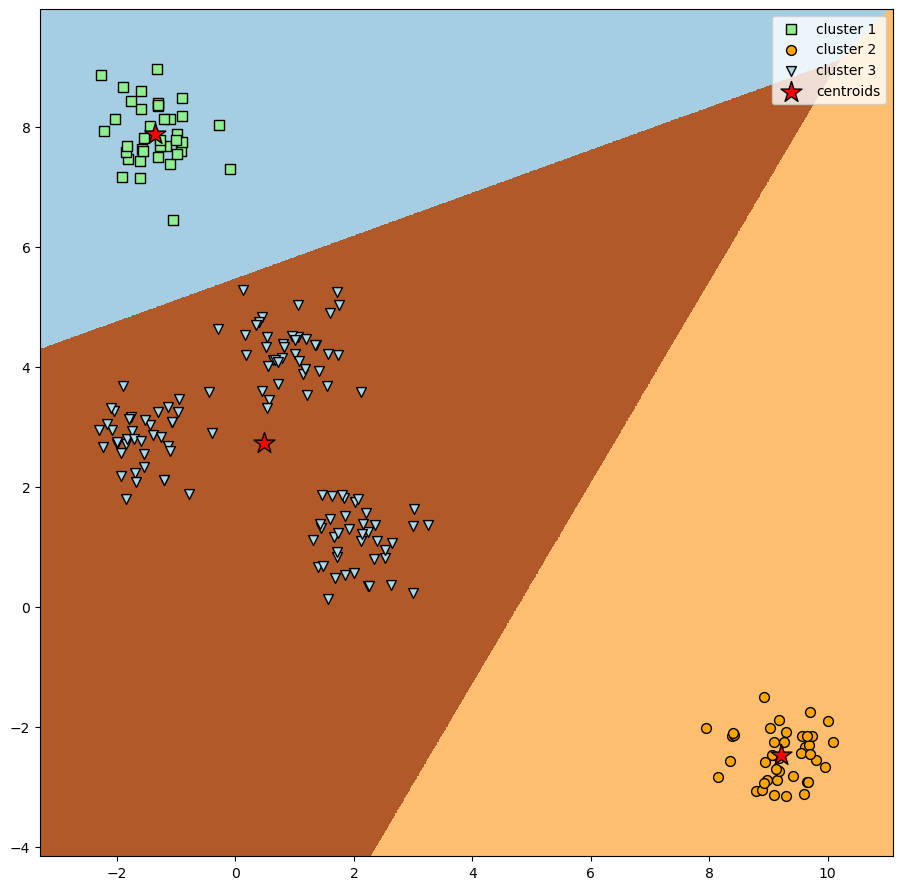

In [135]:
# Cluster'larımızın Sınırlarını Öğrenelim

# Mesh size
h = .01

# Sınırlarımızı Belirleyelim
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Bu Sınırlar İçerisinde Bir Mesh Oluşturalım
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Mesh'i Modelden Geçirelim
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Mesh'i Görselleştirelim
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# Veriyi Görselleştirelim
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Veri Merkezlerini Yazalım
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

# Grafik Güncellemeleri
plt.legend(scatterpoints=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.show()

Peki Verimiz k-Means Algoritmasına Uygun Değilse

In [136]:
# Başka Bir Metot ile Rastgele Veri Oluşturalım
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

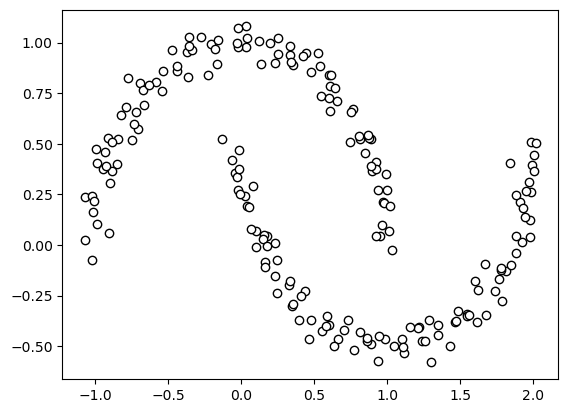

In [137]:
# Verimizi Çizdirelim
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

In [138]:
# Modelimizi Oluşturup Eğitelim
kmeans = KMeans(2)
y_km = kmeans.fit_predict(X)

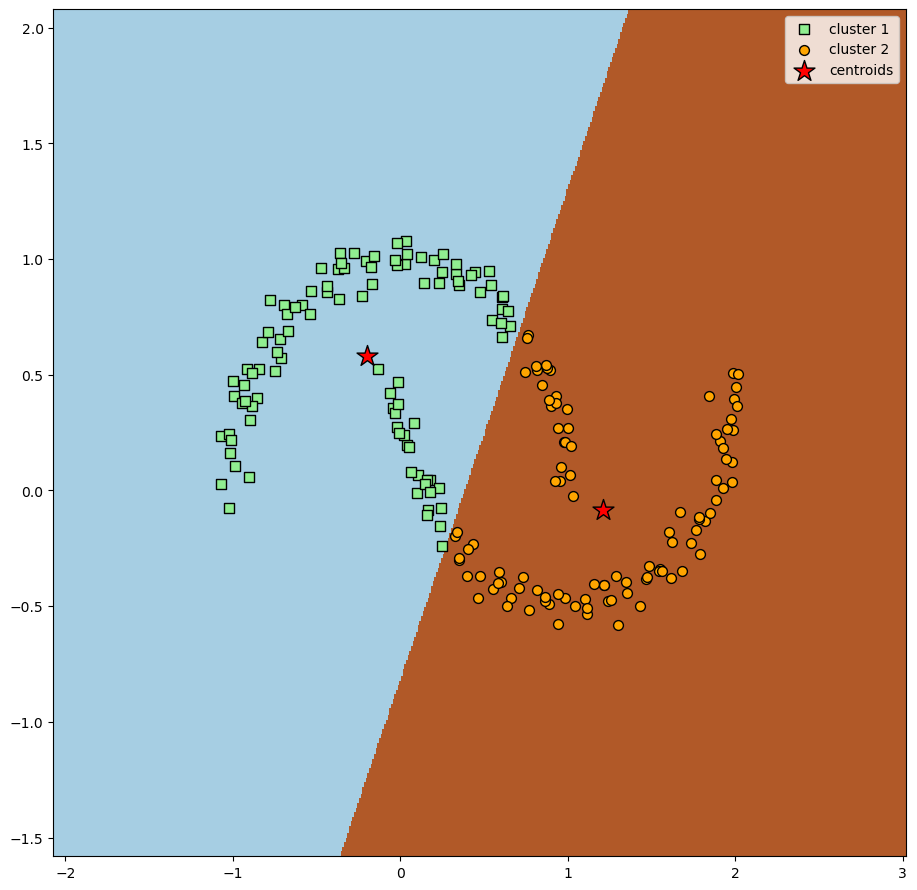

In [139]:
# Cluster'larımızın Sınırlarını Öğrenelim

# Mesh size
h = .01

# Sınırlarımızı Belirleyelim
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Bu Sınırlar İçerisinde Bir Mesh Oluşturalım
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Mesh'i Modelden Geçirelim
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Mesh'i Görselleştirelim
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# Veriyi Görselleştirelim
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# Veri Merkezlerini Yazalım
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

# Grafik Güncellemeleri
plt.legend(scatterpoints=1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
fig = plt.gcf()
fig.set_size_inches(11,11)
plt.show()

---

## Temel Bileşenler Analizi (Principal Component Analysis) Nedir?

Temel amacı yüksek boyutlu verilerde en yüksek varyans ile veri setininde kullanılan öznitelikleri azaltmak ancak bunu yaparken veri kaybını minimize etmek olan **Denetimsiz Öğrenme** algortimasıdır.

PCA'in amacı özniteliklerinden oluşan her bir veri noktasını, veri setindeki tüm noktaları daha iyi/daha temiz açıklayan yeni öznitelik uzayına aktarmaktır.

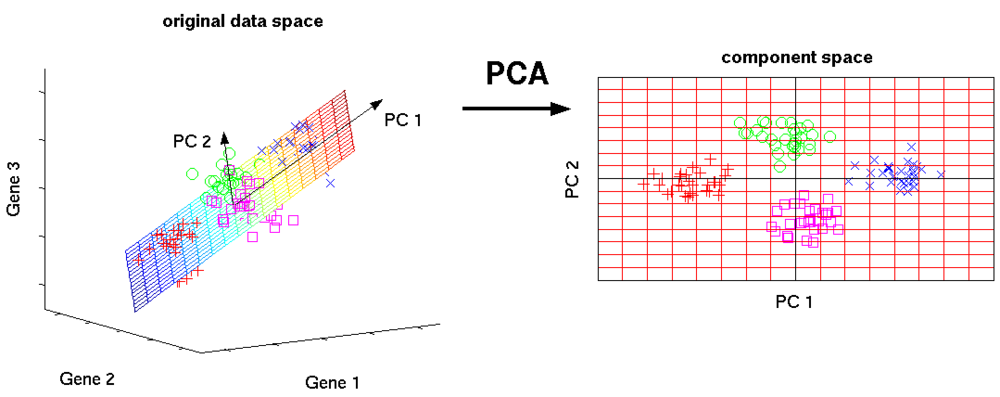

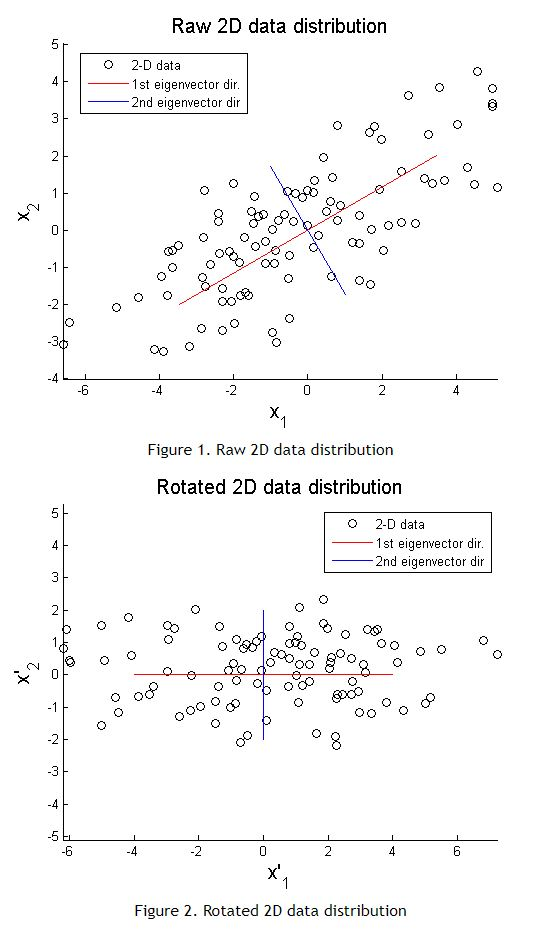

Yeni öznitelik uzayına aktarıldıktan sonra bazı özniteliklere ihtiyaç olmadığı görülebilir.

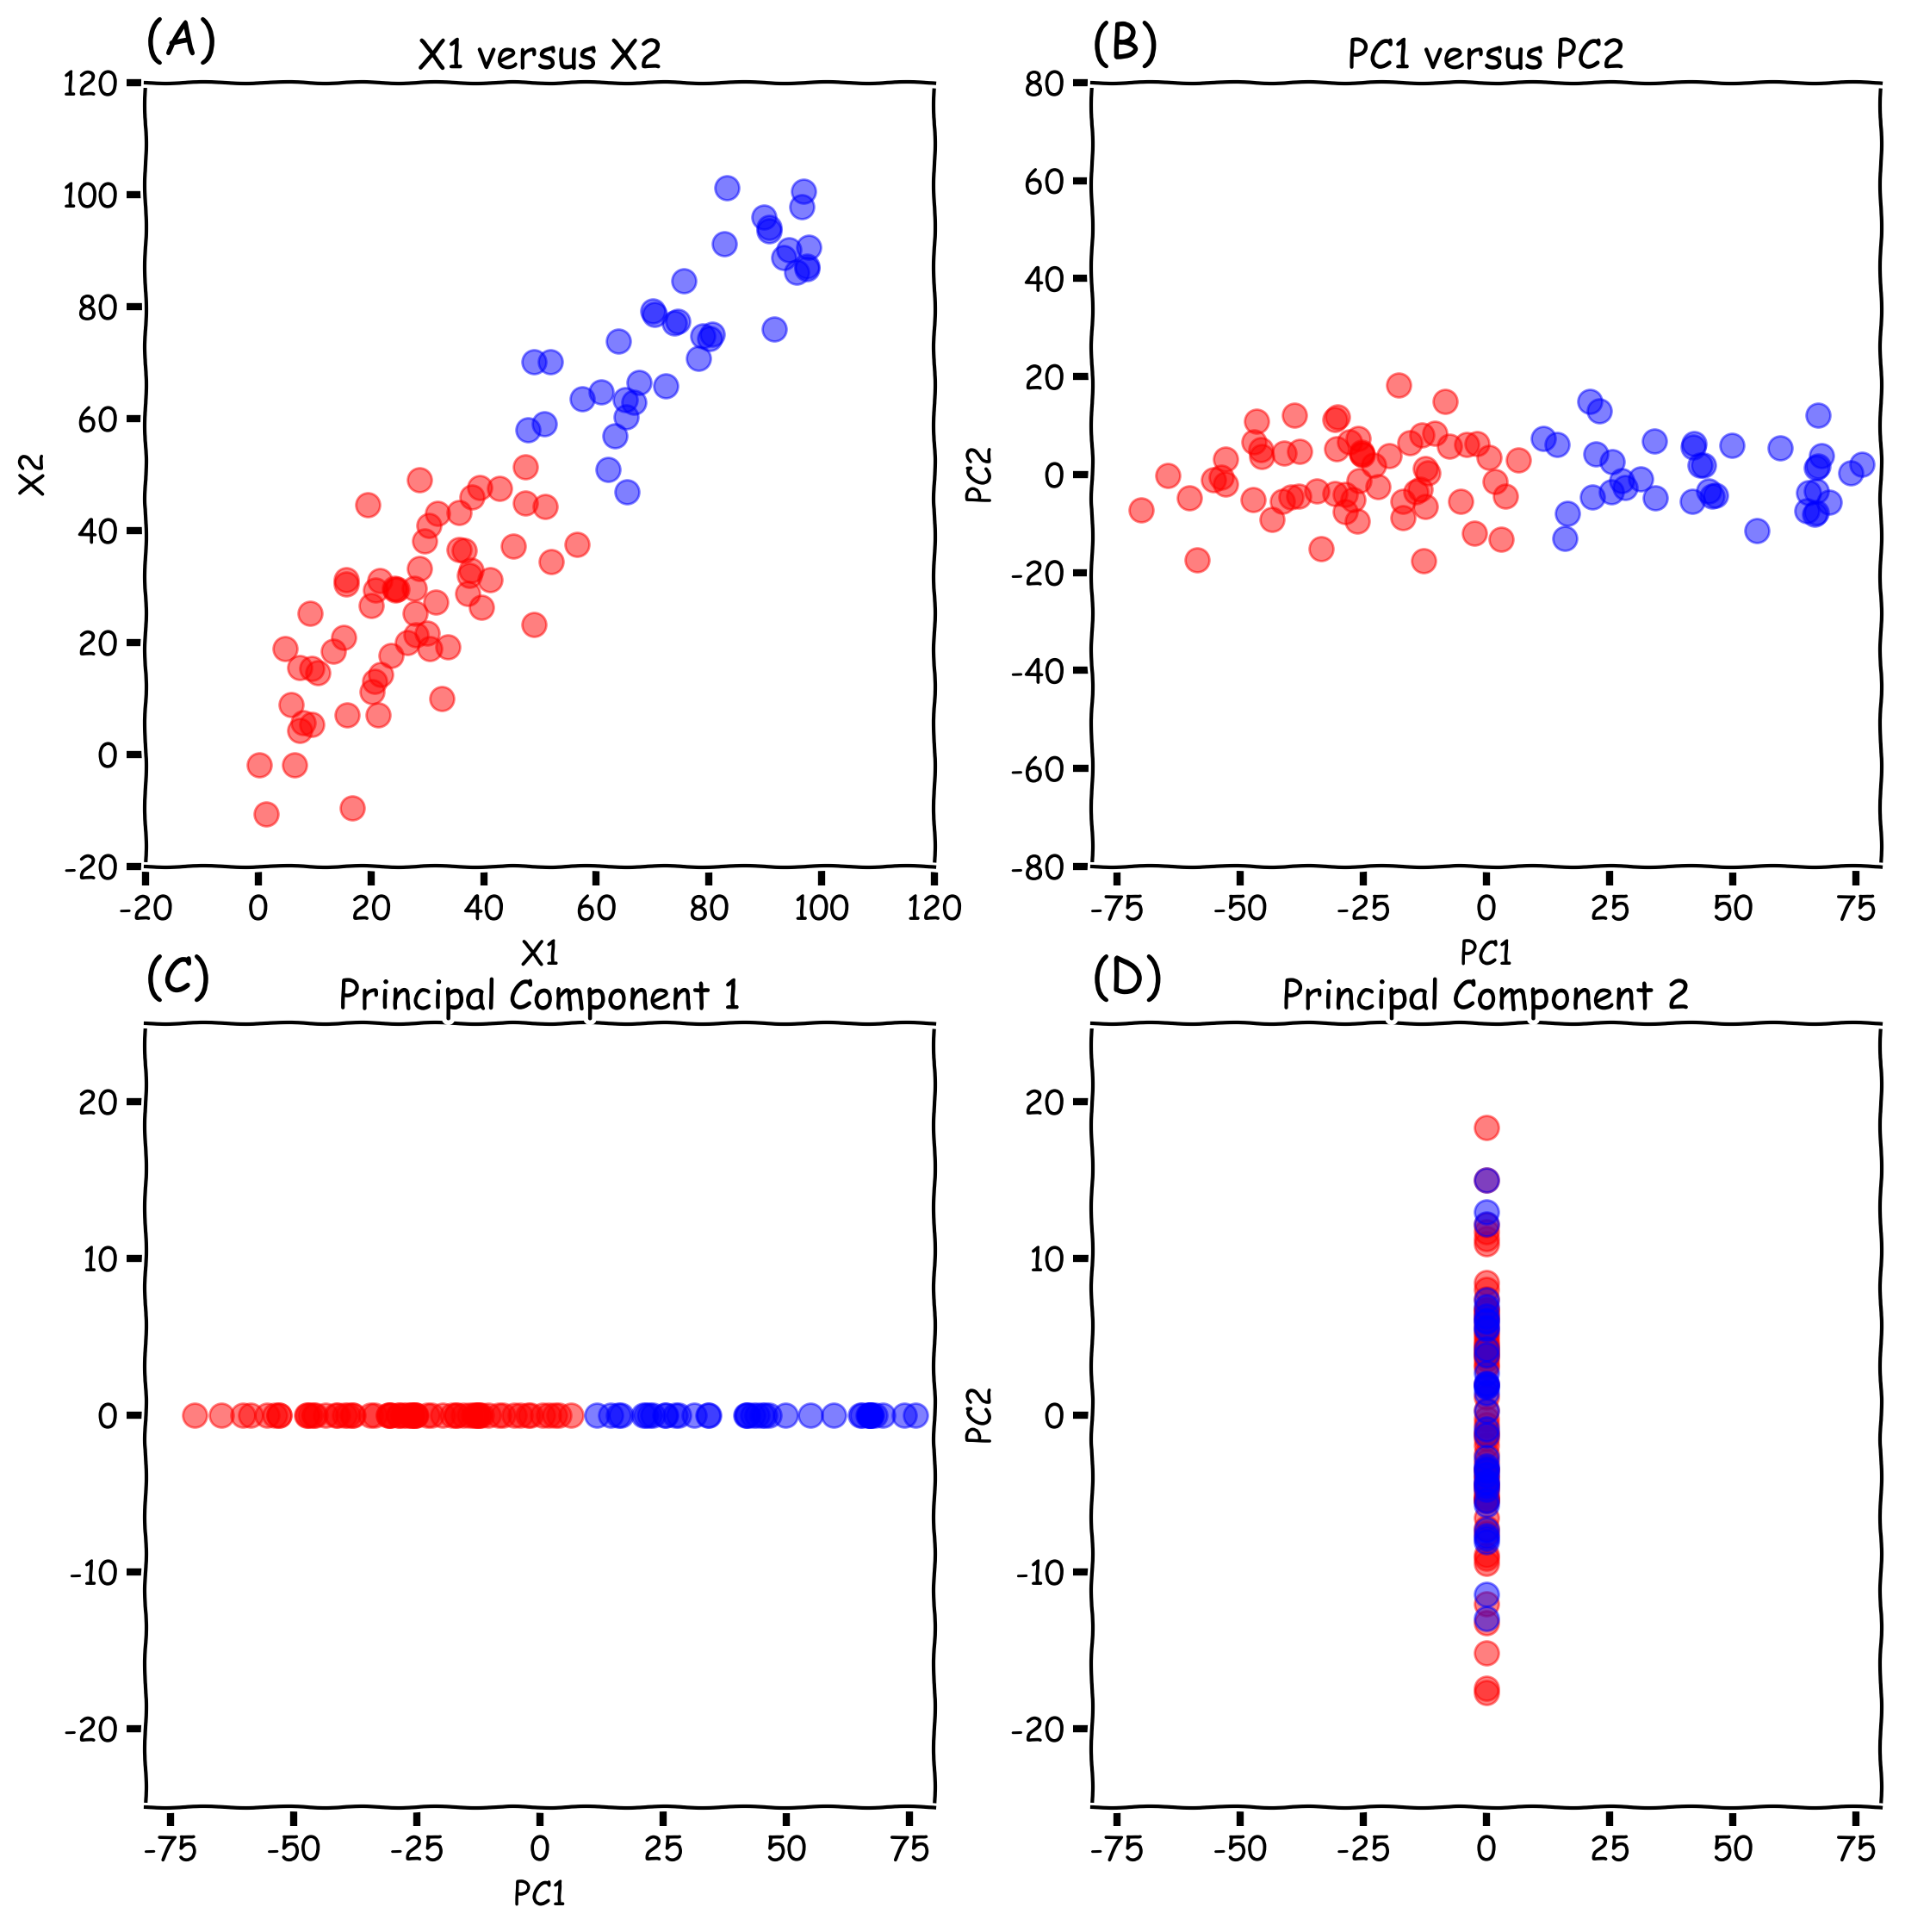

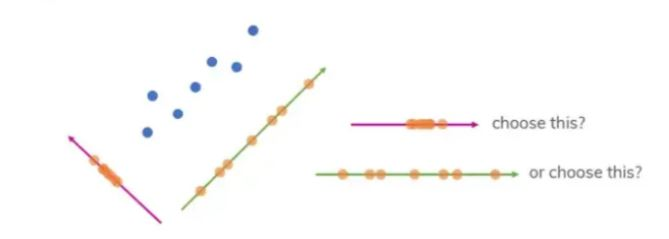

PCA bazı durumlarda işe yaramayacaktır.

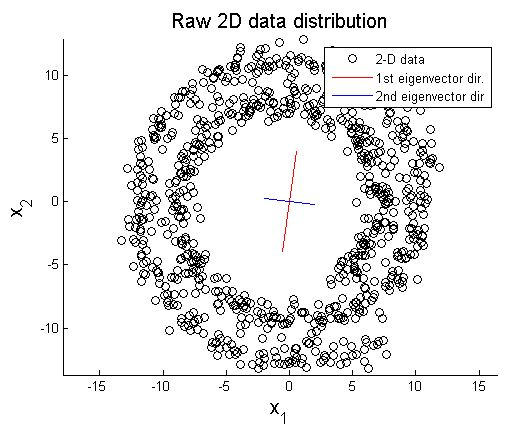

In [140]:
# Kütüphanelerimizi İndirelim
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [141]:
# Verimizi Indirelim
iris = load_iris()

# Verimizi Ayıklayalım
X = iris.data
y = iris.target

# Verimizi Hazırlayalım
df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Label Species  
0      0  setosa  
1      0  setosa  
2      0  setosa  
3      0  setosa  
4      0  setosa

In [142]:
#PCA Modelimizi Oluşturup Kullanalım
pca = PCA()
X_pca = pca.fit_transform(X)

In [143]:
# Hesaplanan Principle Component'ları bir DataFrame'e Koyalım
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
pca_df.head()

PC1       PC2       PC3       PC4
0 -2.684126  0.319397 -0.027915 -0.002262
1 -2.714142 -0.177001 -0.210464 -0.099027
2 -2.888991 -0.144949  0.017900 -0.019968
3 -2.745343 -0.318299  0.031559  0.075576
4 -2.728717  0.326755  0.090079  0.061259

In [144]:
# Tüm Verilerimizi Birleştirelim, Toplu Dursun
df = pd.merge(df, pca_df, right_index=True, left_index=True)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Label Species       PC1       PC2       PC3       PC4  
0      0  setosa -2.684126  0.319397 -0.027915 -0.002262  
1      0  setosa -2.714142 -0.177001 -0.210464 -0.099027  
2      0  setosa -2.888991 -0.144949  0.017900 -0.019968  
3      0  setosa -2.745343 -0.318299  0.031559  0.075576  
4      0  setosa -2.728717  0.326755  0.090079  0.061259

In [145]:
# Her Bir Principle Component'ın Önemine Bakalım
for i in range(4):
    print(f'PC{i+1}: {pca.explained_variance_ratio_[i]}')

PC1: 0.9246187232017271
PC2: 0.05306648311706782
PC3: 0.017102609807929756
PC4: 0.005212183873275369


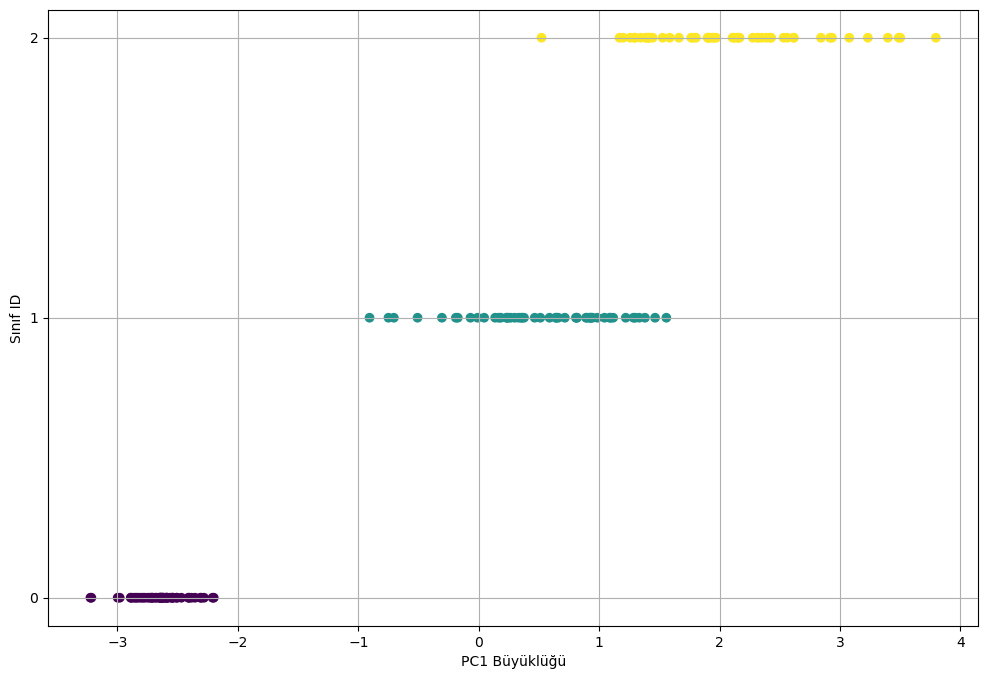

In [146]:
# PC1'e Göre Sınıflarımızı Çizdirelim
plt.figure(figsize=(12,8))
plt.scatter(df["PC1"], df["Label"], c=df["Label"])
plt.xlabel("PC1 Büyüklüğü")
plt.ylabel("Sınıf ID")
plt.yticks([0,1,2])
plt.grid(True)

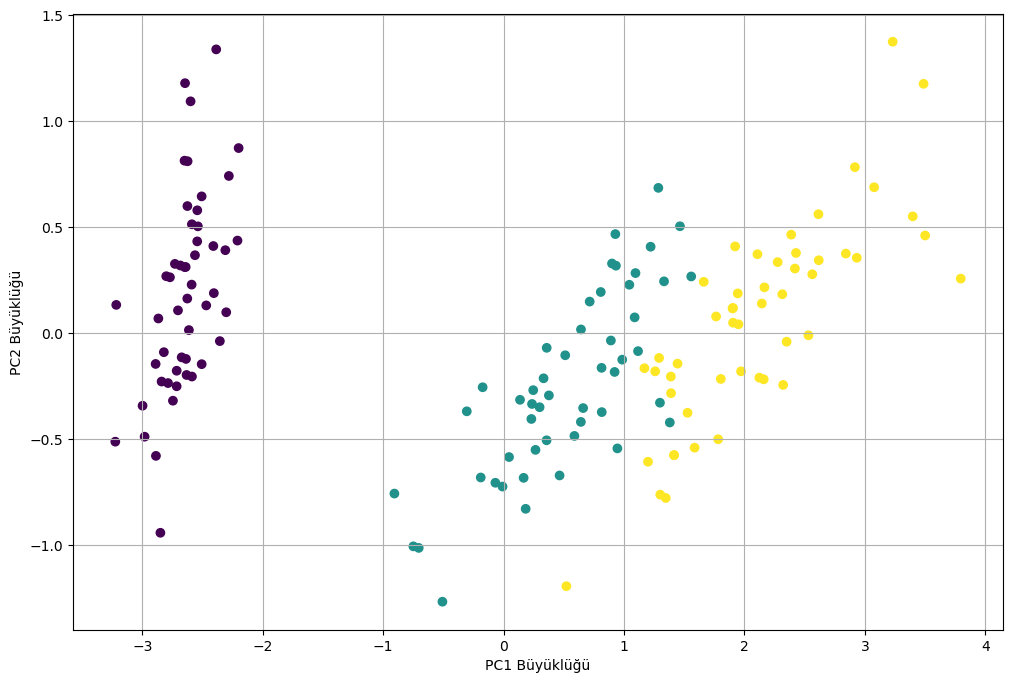

In [147]:
# PC1 ve PC2'ye Göre Sınıflarımızı Çizdirelim
plt.figure(figsize=(12,8))
plt.scatter(df["PC1"], df["PC2"], c=df["Label"])
plt.xlabel("PC1 Büyüklüğü")
plt.ylabel("PC2 Büyüklüğü")
plt.grid(True)